In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

import pandas as pd
import scipy.stats as ss
from scipy.stats import dirichlet
from sklearn.model_selection import train_test_split
#import seaborn
#import plotly
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.metrics import balanced_accuracy_score, precision_score, f1_score, recall_score

In [2]:
# data set 1 two uniformly distributed classes
overlap = 0.1
width_1 = 2
width_2 = 2
height_1 = 2
height_2 = 2
mu_1_x = -1
mu_1_y = 1
mu_2_x = 1.2
mu_2_y = 1

n_1 = 1000
n_2 = 1000

In [3]:
class_1 = np.random.uniform([mu_1_x-width_1/2, mu_1_y-height_1/2], [mu_1_x+width_1/2, mu_1_y+height_1/2], (n_1, 2))
class_2 = np.random.uniform([mu_2_x-width_2/2, mu_2_y-height_2/2], [mu_2_x+width_2/2, mu_2_y+height_2/2], (n_2, 2))

In [4]:
data_sets = {}

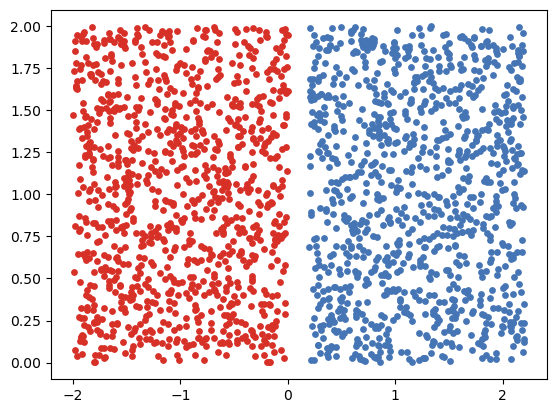

In [5]:
#color_list = np.array([[253,174,97], [69,117,180]]) / 255
color_list = np.array([[165,0,38],
                       [215,48,39],
                       [244,109,67],
                       [253,174,97],
                       [254,224,144],
                       [255,255,191],
                       [224,243,248],
                       [171,217,233],
                       [116,173,209],
                       [69,117,180],
                       [49,54,149]])/255

fig_1, ax_1 = plt.subplots()
ax_1.scatter(class_1[:, 0], class_1[:, 1], color=color_list[1],  s=15)
ax_1.scatter(class_2[:, 0], class_2[:, 1], color=color_list[9],  s=15)
plt.show()

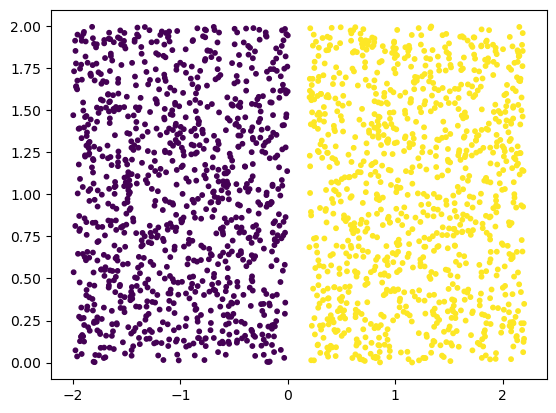

In [6]:
labels_1 = np.zeros((n_1, 1))
labels_2 = np.ones((n_2, 1))

class_1_1 = np.hstack([class_1, labels_1])
class_2_1 = np.hstack([class_2, labels_2])

data_set_uf_hm_l = np.vstack([class_1_1, class_2_1])
np.random.shuffle(data_set_uf_hm_l)
fig_1_1, ax_1_1 = plt.subplots()
ax_1_1.scatter(data_set_uf_hm_l[:, 0], data_set_uf_hm_l[:, 1], s=10, c=data_set_uf_hm_l[:, 2].astype('float'))

plt.show()
data_sets['uniform_hard_margin_straight_line'] = data_set_uf_hm_l

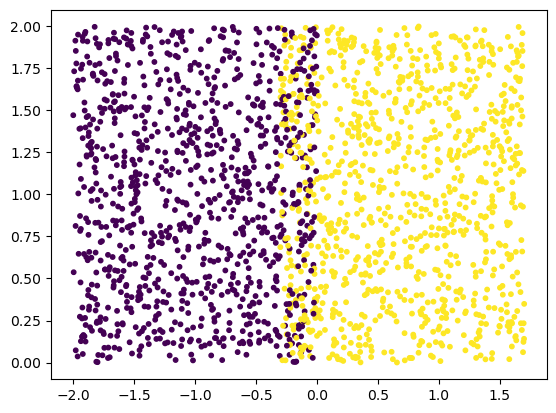

In [7]:
class_2_2 = class_2_1
class_2_2[:, 0] = class_2_2[:, 0] - 0.5
data_set_uf_sm_l = np.vstack([class_1_1, class_2_2])
np.random.shuffle(data_set_uf_sm_l)

fig_1_1, ax_1_1 = plt.subplots()
ax_1_1.scatter(data_set_uf_sm_l[:, 0], data_set_uf_sm_l[:, 1], s=10, c=data_set_uf_sm_l[:, 2].astype('float'))
plt.show()
data_sets['uniform_soft_margin_straight_line'] = data_set_uf_sm_l

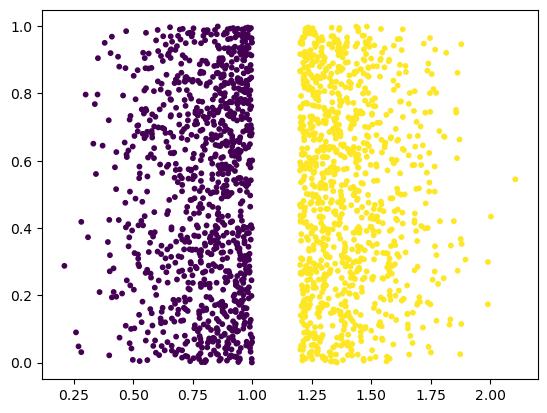

In [8]:
class_3 = np.random.beta([4, 1], [1, 1], size=(n_1, 2))
class_4 = np.random.beta([4, 1], [1, 1], size=(n_1, 2))
class_4[:, 0] = class_4[:, 0] * -1 +2.2

class_3_1 = np.hstack([class_3, labels_1])
class_4_1 = np.hstack([class_4, labels_2])

data_set_beta_hm_l = np.vstack([class_3_1, class_4_1])
np.random.shuffle(data_set_beta_hm_l)

fig_2_1, ax_2_1 = plt.subplots()
ax_2_1.scatter(data_set_beta_hm_l[:, 0], data_set_beta_hm_l[:, 1], s=10, c=data_set_beta_hm_l[:, 2].astype('float'))
plt.show()

data_sets['beta_hard_margin_straight_line'] = data_set_beta_hm_l

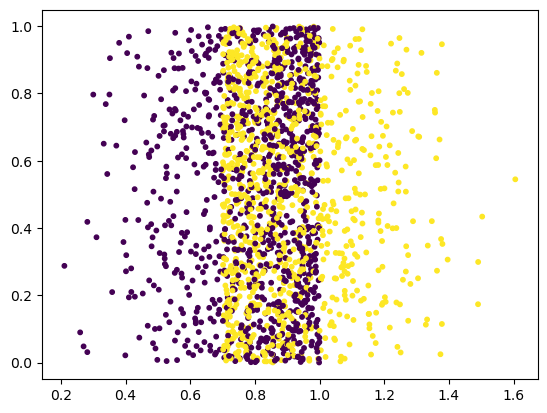

In [9]:
class_4_2 = class_4_1
class_4_2[:, 0] = class_4_2[:, 0] - 0.5
data_set_beta_sm_l = np.vstack([class_3_1, class_4_2])
np.random.shuffle(data_set_beta_sm_l)

fig_2_2, ax_2_2 = plt.subplots()
ax_2_2.scatter(data_set_beta_sm_l[:, 0], data_set_beta_sm_l[:, 1], s=10, c=data_set_beta_sm_l[:, 2].astype('float'))
plt.show()
data_sets['beta_soft_margin_straight_line'] = data_set_beta_sm_l

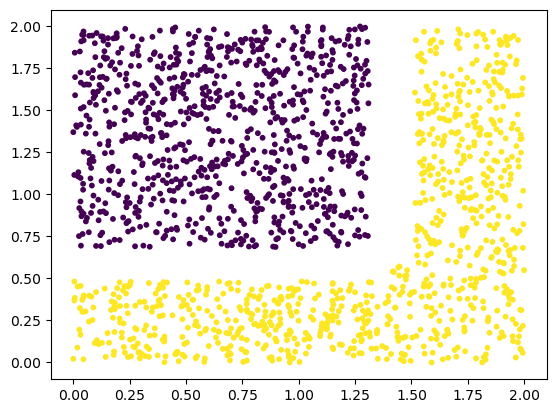

In [10]:
l = 2
mu_x = 1
mu_y = 1
class_5 = np.random.uniform([mu_x-l/2, mu_y-l/2], [mu_x+l/2, mu_y+l/2], (n_1+n_2, 2))
class_5_1 = class_5[class_5[:, 0]>l/np.sqrt(2),:]
class_5_2 = class_5[class_5[:, 0]<l/np.sqrt(2),:]
class_5_3 = class_5_2[class_5_2[:, 1] < l * (1- 1/np.sqrt(2)), :]
class_5_2 = class_5_2[class_5_2[:, 1] > l * (1- 1/np.sqrt(2)), :]
class_5_4 = class_5_1[class_5_1[:, 1] < l * (1- 1/np.sqrt(2)), :]
class_5_1 = class_5_1[class_5_1[:, 1] > l * (1- 1/np.sqrt(2)), :]

class_5_2_1 = class_5_2[class_5_2[:, 0] < l/np.sqrt(2) - l * 0.05]
class_5_2_1 = class_5_2_1[class_5_2_1[:, 1] > l * (1- 1/np.sqrt(2)) + l *0.05]
class_5_1_1 = class_5_1[class_5_1[:, 0] > l/np.sqrt(2) + l * 0.05]
class_5_3_1 = class_5_3[class_5_3[:, 1] < l * (1- 1/np.sqrt(2)) - l *0.05]


#class_5 = class_5_2[class_5_2[:, 1]>l*(1-1/np.sqrt(2))+0.1, :]
class_5 = class_5_2_1
class_6 = np.vstack([class_5_1_1, class_5_3_1, class_5_4])


labels_1_1=np.zeros((len(class_5), 1))
labels_2_1=np.ones((len(class_6), 1))

class_5_1 = np.hstack([class_5, labels_1_1])
class_6_1 = np.hstack([class_6, labels_2_1])

#class_6_1[:, 0] = class_6_1[:, 0] + 0.2
#class_6_1[:, 1] = class_6_1[:, 1] - 0.2

data_set_uf_hm_sq = np.vstack([class_5_1, class_6_1])

fig_3_1, ax_3_1 = plt.subplots()
ax_3_1.scatter(data_set_uf_hm_sq[:, 0], data_set_uf_hm_sq[:, 1], s=10, c=data_set_uf_hm_sq[:, 2].astype('float'))
plt.show()

data_sets['uniform_hard_margin_corner'] = data_set_uf_hm_sq

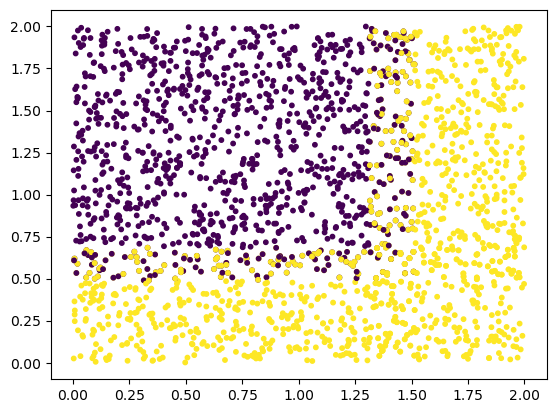

In [11]:
l = 2
mu_x = 1
mu_y = 1
class_5 = np.random.uniform([mu_x-l/2, mu_y-l/2], [mu_x+l/2, mu_y+l/2], (n_1+n_2, 2))
class_5_1 = class_5[class_5[:, 0]>l/np.sqrt(2) - l * 0.05,:]
class_5_2 = class_5[class_5[:, 0]<l/np.sqrt(2) + l * 0.05,:]
class_5_3 = class_5_2[class_5_2[:, 1] < l * (1- 1/np.sqrt(2)) + l * 0.05, :]
class_5_2 = class_5_2[class_5_2[:, 1] > l * (1- 1/np.sqrt(2)) - l * 0.05, :]
class_5_4 = class_5_1[class_5_1[:, 1] < l * (1- 1/np.sqrt(2)) + l * 0.05, :]
class_5_1 = class_5_1[class_5_1[:, 1] > l * (1- 1/np.sqrt(2)) - l * 0.05, :]

#class_5_2_1 = class_5_2[class_5_2[:, 0] < l/np.sqrt(2) - l * 0.05]
#class_5_2_1 = class_5_2_1[class_5_2_1[:, 1] > l * (1- 1/np.sqrt(2)) + l *0.05]
#class_5_1_1 = class_5_1[class_5_1[:, 0] > l/np.sqrt(2) + l * 0.05]
#class_5_3_1 = class_5_3[class_5_3[:, 1] < l * (1- 1/np.sqrt(2)) - l *0.05]

#class_5 = class_5_2[class_5_2[:, 1]>l*(1-1/np.sqrt(2))+0.1, :]
class_7 = class_5_2
class_8 = np.vstack([class_5_1, class_5_3, class_5_4])


labels_1_1=np.zeros((len(class_7), 1))
labels_2_1=np.ones((len(class_8), 1))

class_7 = np.hstack([class_7, labels_1_1])
class_8 = np.hstack([class_8, labels_2_1])

data_set_uf_sm_sq = np.vstack([class_7, class_8])
np.random.shuffle(data_set_uf_sm_sq)

fig_3_2, ax_3_2 = plt.subplots()
ax_3_2.scatter(data_set_uf_sm_sq[:, 0], data_set_uf_sm_sq[:, 1], s= 10, c=data_set_uf_sm_sq[:, 2].astype('float'))
plt.show()
data_sets['uniform_soft_margin_corner'] = data_set_uf_sm_sq

In [12]:
def gaussian_generator(center, eig_val, eig_vec, size):
    sigma = np.matmul(np.matmul(eig_vec, eig_val), np.transpose(eig_vec))
    data_set = np.random.multivariate_normal(center, sigma, size)

    return data_set

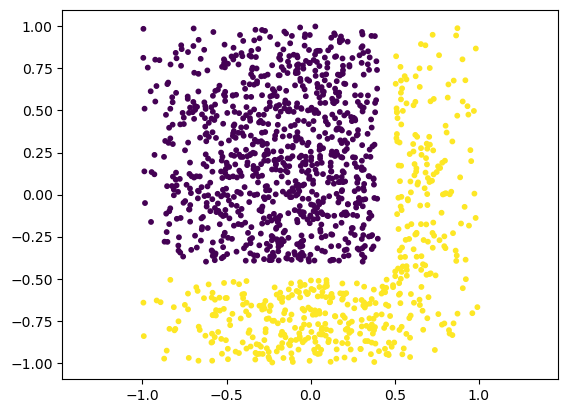

In [13]:
n_1 = 2000  # number of the elements
mu_1 = np.array([0, 0])  # center (centroid)

# sigma is expected to be positive  semi-definite matrix
w_1 = np.array([[1.5, 0], [0, 4.5]])  # eigenvalues
v_1 = np.array([[0.4, 0], [0, 0.4]])  # eigenvectors

set_1 = gaussian_generator(mu_1,w_1, v_1, n_1)

set_1_1 = set_1[set_1[:, 0] > 0.5, :]
set_1_2 = set_1[set_1[:, 0] < 0.5, :]

set_1_3 = set_1_1[set_1_1[:, 1] < -0.5, :]
set_1_1 = set_1_1[set_1_1[:, 1] > -0.5, :]
set_1_4 = set_1_2[set_1_2[:, 1] < -0.5, :]
set_1_2= set_1_2[set_1_2[:, 1] > -0.5, :]

set_2_1 = set_1_1
set_2_2 = set_1_2
set_2_3 = set_1_3
set_2_4 = set_1_4

set_2_1 = set_2_1
set_2_2[:, 0] = set_2_2[:, 0] - 0.1
set_2_2[:, 1] = set_2_2[:, 1] + 0.1
set_2_4 = set_2_4
set_2_3[:, 0] = set_2_3[:, 0]
set_2_3[:, 1] = set_2_3[:, 1]

class_9 = set_2_2
class_10 = np.vstack([set_2_1, set_2_3, set_2_4])

labels_9 = np.zeros((len(class_9), 1))
labels_10 = np.ones((len(class_10), 1))

class_9 = np.hstack([class_9, labels_9])
class_10 = np.hstack([class_10, labels_10])

data_set_norm_hm_sq = np.vstack([class_9, class_10])
np.random.shuffle(data_set_norm_hm_sq)

data_set_norm_hm_sq = data_set_norm_hm_sq[data_set_norm_hm_sq[:, 0] < 1, :]
data_set_norm_hm_sq = data_set_norm_hm_sq[data_set_norm_hm_sq[:, 0] > -1, :]

data_set_norm_hm_sq = data_set_norm_hm_sq[data_set_norm_hm_sq[:, 1] < 1, :]
data_set_norm_hm_sq = data_set_norm_hm_sq[data_set_norm_hm_sq[:, 1] > -1, :]


fig_5, ax_5 = plt.subplots()
ax_5.scatter(data_set_norm_hm_sq[:, 0],  data_set_norm_hm_sq[:, 1], s=10, c=data_set_norm_hm_sq[:, 2].astype('float'))
ax_5.axis('equal')
plt.show()
data_sets['normal_hard_margin_corner'] = data_set_norm_hm_sq

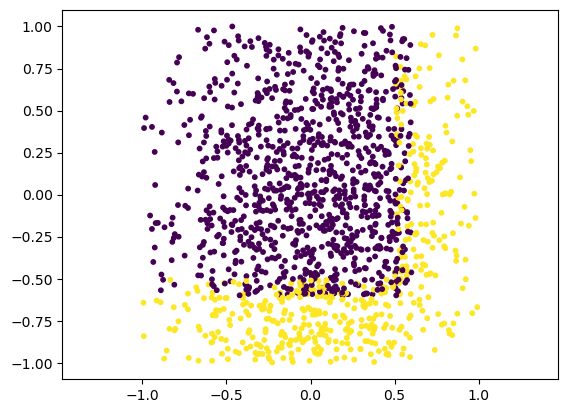

In [14]:
set_2_1 = set_1_1
set_2_2 = set_1_2
set_2_3 = set_1_3
set_2_4 = set_1_4

set_2_1 = set_2_1
set_2_2[:, 0] = set_2_2[:, 0] + 0.2
set_2_2[:, 1] = set_2_2[:, 1] - 0.2
set_2_4 = set_2_4
set_2_3[:, 0] = set_2_3[:, 0]
set_2_3[:, 1] = set_2_3[:, 1]

class_9 = set_2_2
class_10 = np.vstack([set_2_1, set_2_3, set_2_4])

labels_9 = np.zeros((len(class_9), 1))
labels_10 = np.ones((len(class_10), 1))

class_9 = np.hstack([class_9, labels_9])
class_10 = np.hstack([class_10, labels_10])

data_set_norm_sm_sq = np.vstack([class_9, class_10])
np.random.shuffle(data_set_norm_sm_sq)

data_set_norm_sm_sq = data_set_norm_sm_sq[data_set_norm_sm_sq[:, 0] < 1, :]
data_set_norm_sm_sq = data_set_norm_sm_sq[data_set_norm_sm_sq[:, 0] > -1, :]

data_set_norm_sm_sq = data_set_norm_sm_sq[data_set_norm_sm_sq[:, 1] < 1, :]
data_set_norm_sm_sq = data_set_norm_sm_sq[data_set_norm_sm_sq[:, 1] > -1, :]

fig_6, ax_6 = plt.subplots()
ax_6.scatter(data_set_norm_sm_sq[:, 0],  data_set_norm_sm_sq[:, 1], s=10, c=data_set_norm_sm_sq[:, 2].astype('float'))
ax_6.axis('equal')
plt.show()
data_sets['normal_soft_margin_corner'] = data_set_norm_sm_sq

In [19]:
set_list = list(data_sets.keys())
set_list

['uniform_hard_margin_straight_line',
 'uniform_soft_margin_straight_line',
 'beta_hard_margin_straight_line',
 'beta_soft_margin_straight_line',
 'uniform_hard_margin_corner',
 'uniform_soft_margin_corner',
 'normal_hard_margin_corner',
 'normal_soft_margin_corner']

In [30]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

goodness_indexes = ["Accuracy", "Precision", "Recall", "F1-score"]
g_indexes = [balanced_accuracy_score, precision_score, recall_score, f1_score]


In [34]:
def apply_classifiers(data_set):
    train_set, test_set = train_test_split(data_set, test_size=0.3, train_size=0.7)
    a = np.zeros((len(names), len(goodness_indexes)))
    goodness_table =pd.DataFrame(np.zeros((len(names), len(goodness_indexes))), names, goodness_indexes)
    for name, clf in zip(names, classifiers):
        clf.fit(train_set[:, 0:2], train_set[:, 2])

        y_hat = clf.predict(test_set[:, 0:2])


        goodness_table[names.index(name), goodness_indexes[0]] = balanced_accuracy_score(test_set[:, 2], y_hat)
        goodness_table[names.index(name), goodness_indexes[1]] = precision_score(test_set[:, 2], y_hat)
        goodness_table[names.index(name), goodness_indexes[2]] = recall_score(test_set[:, 2], y_hat)
        goodness_table[names.index(name), goodness_indexes[3]] = f1_score(test_set[:, 2], y_hat)


    return goodness_table

In [35]:
gt = apply_classifiers(data_sets[set_list[0]])
gt

KeyboardInterrupt: 

In [33]:
print(gt)

                   Accuracy  Precision  Recall  F1-score  (0, Accuracy)  \
Nearest Neighbors       0.0        0.0     0.0       0.0            1.0   
Linear SVM              0.0        0.0     0.0       0.0            1.0   
RBF SVM                 0.0        0.0     0.0       0.0            1.0   
Gaussian Process        0.0        0.0     0.0       0.0            1.0   
Decision Tree           0.0        0.0     0.0       0.0            1.0   
Random Forest           0.0        0.0     0.0       0.0            1.0   
Neural Net              0.0        0.0     0.0       0.0            1.0   
AdaBoost                0.0        0.0     0.0       0.0            1.0   
Naive Bayes             0.0        0.0     0.0       0.0            1.0   
QDA                     0.0        0.0     0.0       0.0            1.0   

                   (0, Precision)  (0, Recall)  (0, F1-score)  (1, Accuracy)  \
Nearest Neighbors             1.0          1.0            1.0            1.0   
Linear SVM    

In [ ]:
from scipy.stats import dirichlet
var_1 = dirichlet([2,2,5])
var_2 = dirichlet([2,2,5])
var_3 = dirichlet([2,2,5])
var_4 = dirichlet([2,2,5])
set_1 = var_1.rvs(500)
set_2 = var_2.rvs(500)
set_3 = var_3.rvs(500)
set_4 = var_4.rvs(500)

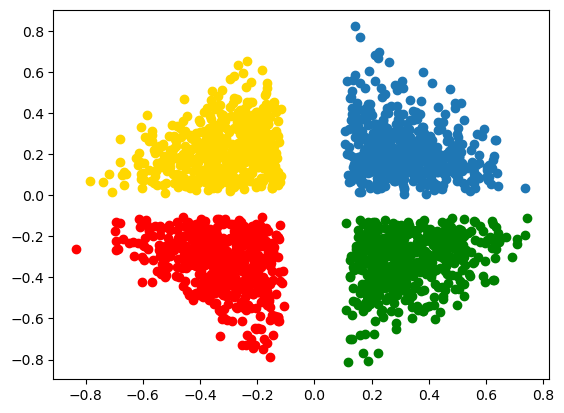

In [19]:
#theta = np.pi / 4
#rot_mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
#set_11 = set_1[:, 0:2]

#set_1_1 = np.matmul(set_11, rot_mat)

set_2[:, 0] = set_2[:, 0] * -1
set_3 = set_3 * -1
set_4[:, 1] = set_4[:, 1] *-1

set_1[:, 0] = set_1[:, 0] + 0.1
set_2[:, 0] = set_2[:, 0] - 0.1

set_3[:, 0] = set_3[:, 0] - 0.1
set_4[:, 0] = set_4[:, 0] + 0.1

set_3[:, 1] = set_3[:, 1] - 0.1
set_4[:, 1] = set_4[:, 1] -0.1


fig_4, ax_4 = plt.subplots()
ax_4.scatter(set_1[:, 0], set_1[:, 1])
ax_4.scatter(set_2[:, 0], set_2[:, 1], c='gold')
ax_4.scatter(set_3[:, 0], set_3[:, 1], c ='red')
ax_4.scatter(set_4[:, 0], set_4[:, 1], c='green')
plt.show()
